<h1 style="color:#2E86C1; font-family:Georgia; font-weight:bold">
🚢 Titanic Dataset Exploratory Data Analysis (EDA)
</h1>

<h2 style="color:#117864; font-family:Trebuchet MS">
Step 1: Import Required Libraries
</h2>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default style
sns.set(style="whitegrid")

<h2 style="color:#AF601A; font-family:Trebuchet MS">
 Step 2: Load Titanic Dataset
</h2>

In [15]:
# Load the Titanic dataset
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\train.csv")  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2 style="color:#884EA0; font-family:Trebuchet MS">
Step 3: Dataset Overview and Initial Statistics
</h2>

In [16]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
# Summary statistics
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [18]:
# Value counts for categorical features
df['Survived'].value_counts()
df['Pclass'].value_counts()
df['Sex'].value_counts()
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<h2 style="color:#1F618D; font-family:Trebuchet MS">
Step 4: Data Cleaning for Visual Analysis
</h2>

In [19]:
# Drop rows with missing values for numeric analysis
df_clean = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].dropna()

<h2 style="color:#CA6F1E; font-family:Trebuchet MS">
Step 5: Visualizing Relationships using Pairplot
</h2>

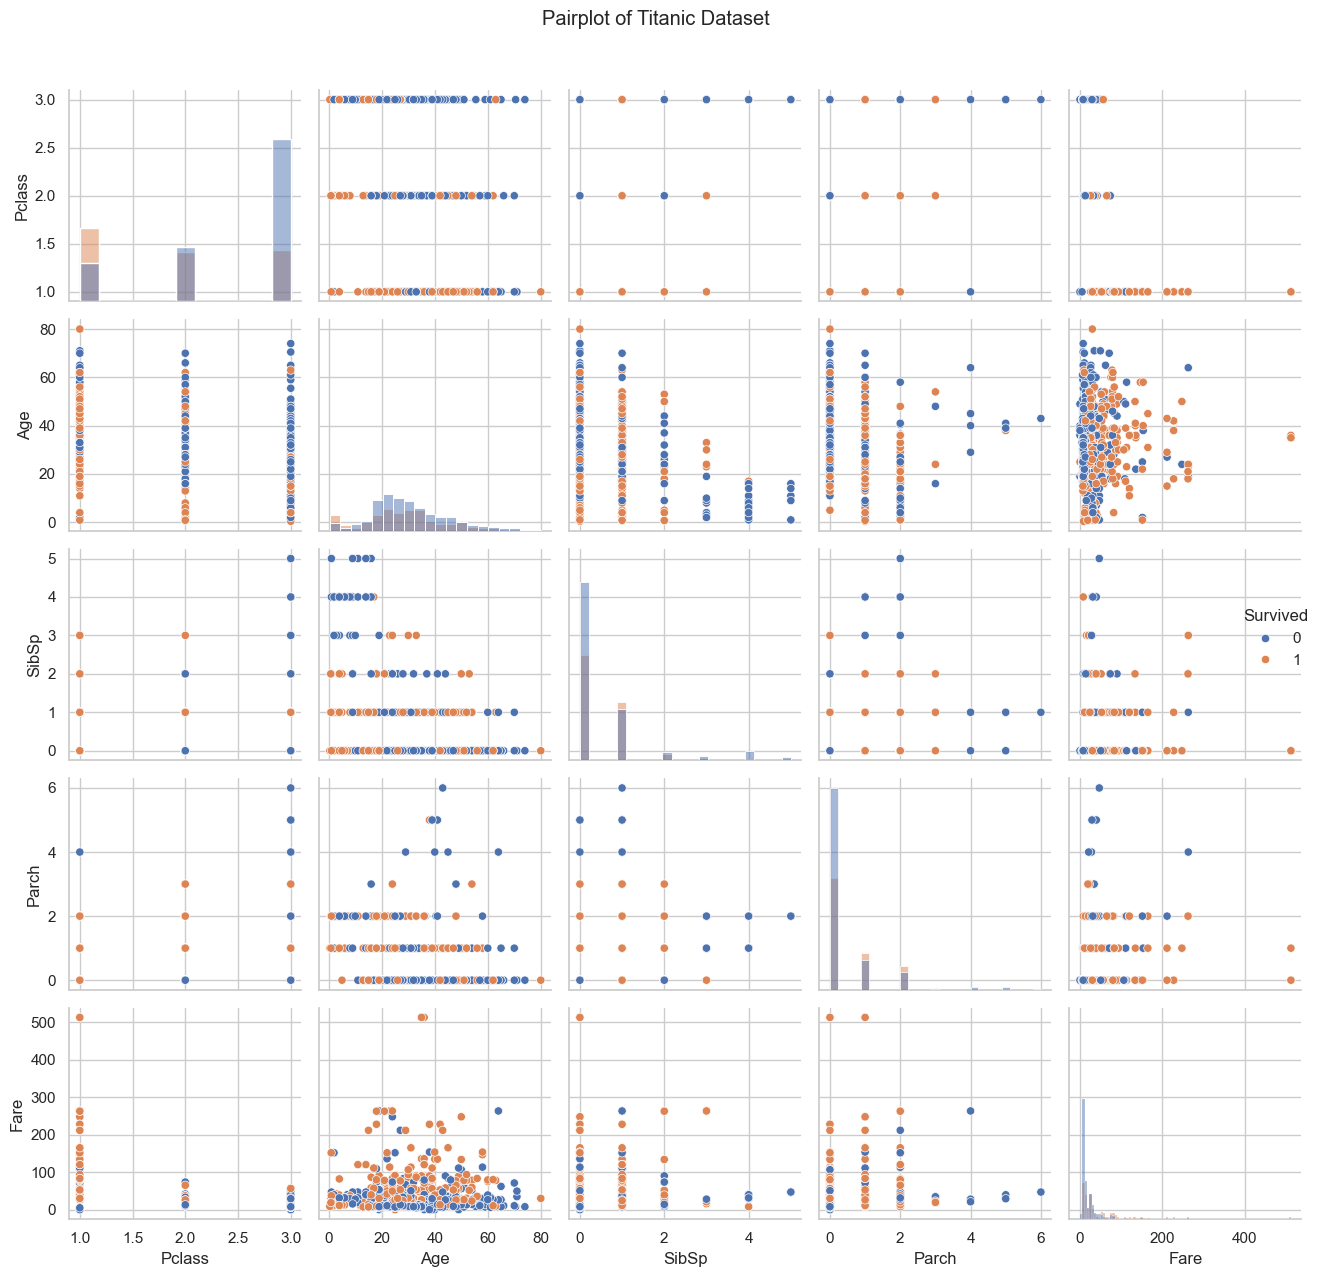

In [20]:
sns.pairplot(df_clean, hue="Survived", diag_kind='hist')
plt.suptitle("Pairplot of Titanic Dataset", y=1.02)
plt.tight_layout()
plt.show()

Survivors tend to have lower fares and fewer family members onboard.

<h2 style="color:#2874A6; font-family:Trebuchet MS">
Step 6: Feature Correlation Heatmap
</h2>

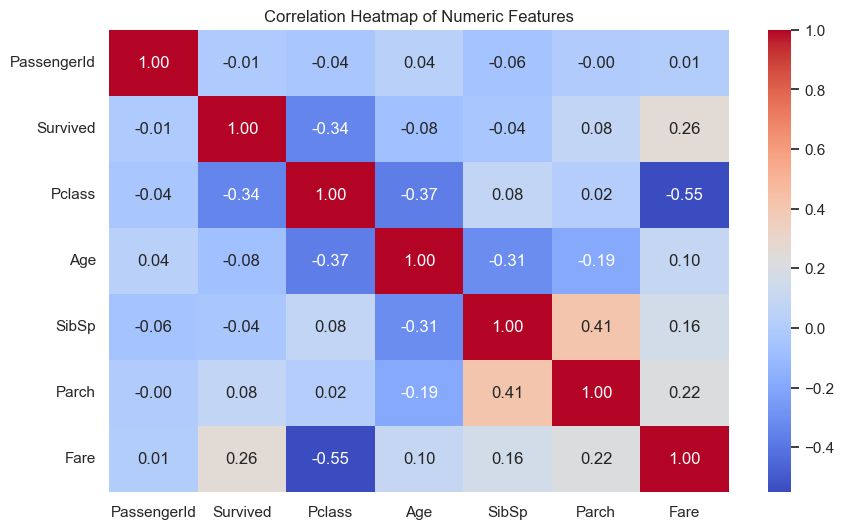

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Fare and Pclass show some correlation with survival.



<h2 style="color:#239B56; font-family:Trebuchet MS">
Step 7: Distribution & Comparison Plots
</h2>

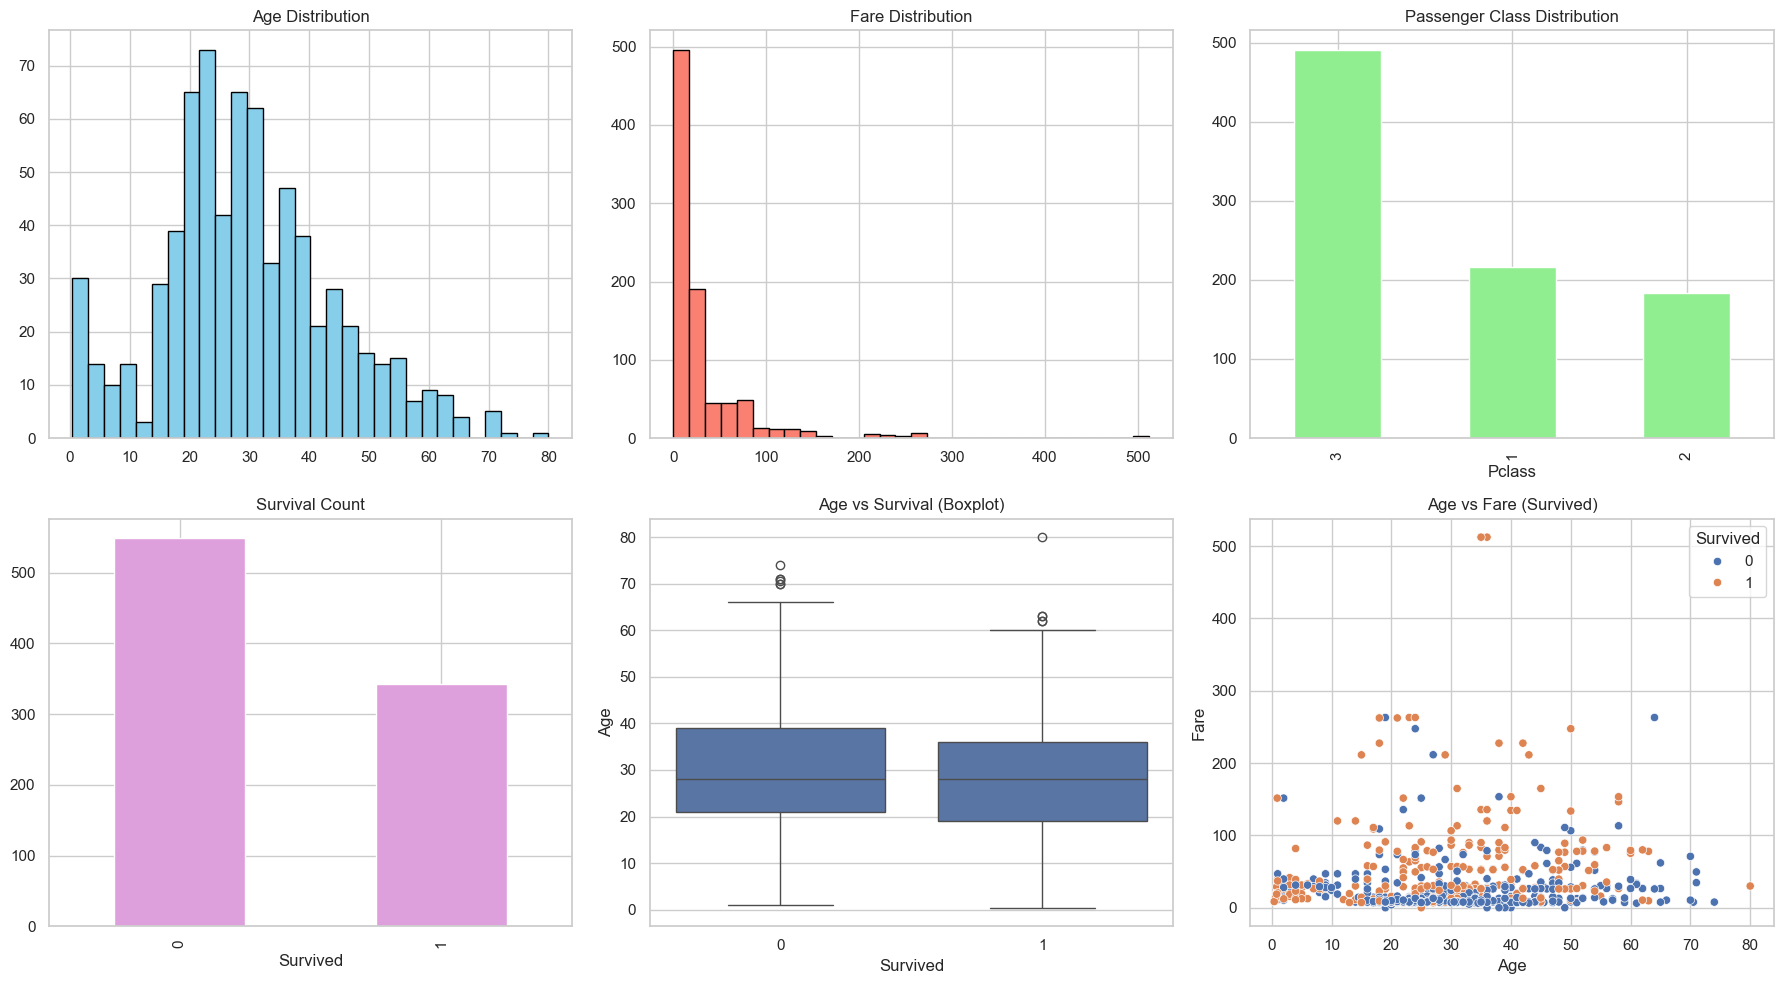

In [22]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Histogram of Age
df['Age'].hist(ax=axs[0, 0], bins=30, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Age Distribution")

# Histogram of Fare
df['Fare'].hist(ax=axs[0, 1], bins=30, color='salmon', edgecolor='black')
axs[0, 1].set_title("Fare Distribution")

# Bar plot of Passenger Class
df['Pclass'].value_counts().plot(kind='bar', ax=axs[0, 2], color='lightgreen')
axs[0, 2].set_title("Passenger Class Distribution")

# Survival Count
df['Survived'].value_counts().plot(kind='bar', ax=axs[1, 0], color='plum')
axs[1, 0].set_title("Survival Count")

# Boxplot: Age vs Survival
sns.boxplot(data=df, x='Survived', y='Age', ax=axs[1, 1])
axs[1, 1].set_title("Age vs Survival (Boxplot)")

# Scatterplot: Age vs Fare
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', ax=axs[1, 2])
axs[1, 2].set_title("Age vs Fare (Survived)")

plt.tight_layout()
plt.show()

<h2 style="color:#943126; font-family:Trebuchet MS">
Step 8: Visual Insights & Observations
</h2>

Younger passengers had a higher survival rate.

Fare positively correlates with survival chances.

Higher-class passengers (Pclass=1) survived more often.



### Summary of Key Insights from EDA
- **Gender & Class Matter**: Females and passengers in 1st class had higher survival rates.
- **Fare Correlation**: Higher fare-paying passengers had better survival chances.
- **Age Influence**: Children and young adults had a higher chance of surviving.
- **Embarked Port**: Most passengers embarked from port 'S' but survival varied across ports.
- **Feature Correlations**:
  - Positive: `Fare` vs `Survived`
  - Negative: `Pclass` vs `Survived`